## Odds and Ends: File Reading and Matplotlib

Now that we're familiar with the essentials of the Python language we're going to practice [reading files](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/WorkingWithFiles.html) and [plotting with Matplotlib](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html). 

Although these topics may be considered "odds and ends", they are common in many day-to-day applications. You'll find that spending some time up front to become familiar with these materials will save a lot of time down the road.

## Problem 1: Reading and Parsing Files
Let's pretend we were conducting a survey of favorite foods. Each participant is asked to list their favorite foods along with its category (e.g. dessert, snack, fruit). The food and category are separated by a colon, and each food-category pair is separated by a comma like so

```food: category, food: category, food: category, ... ```

The results of this survey are stored in a text file, `results.txt`, giving us a great opportunity to practice our file reading skills!

Our task is to write a function called `get_most_popular_foods` that takes a file path of survey results and returns the most common response for each food category in the form of a dictionary where the keys are the food categories and the values are the most common food of that type. If there is a tie, return the food that comes first alphabetically. Note, we don't know which food categories will be given before reading the file.

So, if we had data in the file `example.txt` with the contents below

``` granola bars: snack, shrimp: seafood
granola bars: snack
tuna: seafood ```

Our function would produce the following result
 ``` python
 >>> get_most_popular_foods('example.txt')
  {'snack': 'granola bars', 'seafood': ' shrimp'}
 ```
 
 The `collections.Counter` object will be useful for this problem. Also, the function `itertools.chain` may come in handy.
 
For reference, there is a short example input under `resources/example-survey.txt`. On this input, your function should produce the response as follows
 ``` python
>>> get_most_popular_foods('resources/example-survey.txt')
 {'dessert': 'cake', 'vegetable': 'carrots', 'fruit': 'peaches'}
```

In [237]:
def max_type(indict):
    maxname = ''
    maxval = 0
    alpha = 'abcdefghijklmnopqrstuvwxyz'
    for name, val in indict.items():
        if val > maxval:
            maxval = val
            maxname = name
        elif val == maxval:
            for i in range(min(len(maxname), len(name))):
                if (alpha.index(maxname[i]) > alpha.index(name[i])):
                    maxname = name   
                    break
                elif (alpha.index(maxname[i]) < alpha.index(name[i])):
                    break
    return maxname
def get_most_popular_foods(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    foods = {}
    
    for item in lines:
        items = [food.strip() for food in item.split(',')]
        for pair in items:
            name, category = map(str.strip, pair.split(':'))
    
            if category in foods:
                if name in foods[category]:
                    foods[category][name] += 1

                elif name not in foods[category]:
                    foods[category][name] = 1

            elif category not in foods:
                foods[category] = {name : 1}
    result = {}
    
    
    for category, type_list in foods.items():
        result[category] = max_type(type_list)
    
    return result
    pass

In [238]:
from bwsi_grader.python.odds_and_ends import grade_file_parser
grade_file_parser(get_most_popular_foods)


============================== ALL TESTS PASSED! ===============================
Your submission code: bwb8b7694e6fad3035e4331f2d41fa9477ec007cc11e40a8338b9390b5



## Problem 2: Plotting an Image with Matplotlib

We have an image in the file `resources/mystery-img.npy`. Read and plot the image, then answer the following for Question 2 of the homework:

__What is in this image?__

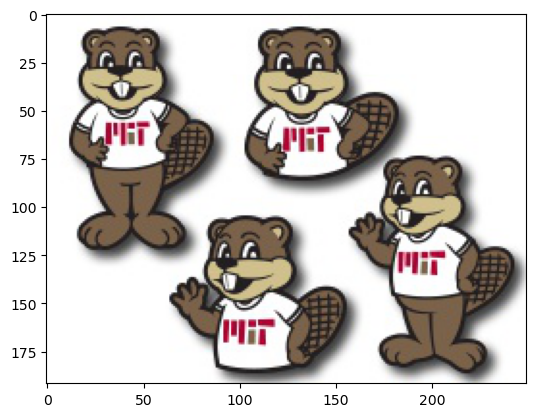

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
path = 'mystery-img.npy'
plt.imshow(np.load(path))